Supervised Learning - XGBoost

In [0]:
import pandas as pd

unsupervised_pdf = pd.read_csv("/dbfs/mnt/my-mount/unsupervised_pdf.csv")
print(unsupervised_pdf.head()) 

      transaction_time  TransactionDT  ... pseudo_label_avg  pseudo_label_weighted
0  2025-01-14 09:56:23          86400  ...                0                      0
1  2025-04-20 22:42:41          86401  ...                0                      0
2  2025-04-09 19:27:13          86469  ...                0                      0
3  2025-01-30 01:26:54          86499  ...                0                      0
4  2025-01-24 22:58:30          86506  ...                0                      0

[5 rows x 44 columns]


In [0]:
from sklearn.preprocessing import StandardScaler

feature_cols = [
    'TransactionAmt', 'hour', 'voice_match', 'is_new_account_for_user',
    'avg_amount_to_bank', 'amount_ratio_to_bank_avg', 'is_nighttime', 
    'recent_transaction_gap','is_new_device', 'vpn', 'rooting'
]

# 입력 데이터
X_raw = unsupervised_pdf[feature_cols]
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
print(f'X:{X}')

#타겟
y = unsupervised_pdf['pseudo_label_avg']
print(f'y:{y}')

X:[[-0.27816747 -0.35987014  0.99989163 ... -1.00064369 -0.99886271
  -0.99915706]
 [-0.44332726  1.51973769 -1.00010838 ... -1.00064369 -0.99886271
  -0.99915706]
 [-0.31788944  1.08598204  0.99989163 ... -1.00064369  1.00113859
   1.00084365]
 ...
 [-0.4351738   1.51973769 -1.00010838 ... -1.00064369 -0.99886271
   1.00084365]
 [-0.07537632  1.23056725  0.99989163 ... -1.00064369 -0.99886271
   1.00084365]
 [ 0.6059601  -0.7936258  -1.00010838 ... -1.00064369  1.00113859
  -0.99915706]]
y:0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    1
Name: pseudo_label_avg, Length: 590540, dtype: int64


In [0]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/63/f1/653afe1a1b7e1d03f26fd4bd30f3eebcfac2d8982e1a85b6be3355dcae25/xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/48/fb/ec4ac065d9b0d56f72eaf1d9b0df601e33da28197b32ca351dc05b342611/nvidia_nccl_cu12-2.26.5-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/253.9 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/253.9 MB 3.2 MB/s eta 0:01:19
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/253.9 MB 12.0 MB/s eta 0:00:22
   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/253.9 MB 38.6 MB/s eta 0:00:07
   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/253.9 MB 56.9 MB/s eta 0:00:05
   ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/253.9 MB 153.1 MB/s eta 0:00:02
   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/253.9 MB 1

In [0]:
#학습/검증 분리

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(
  X, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost 훈련
xgb_model = xgb.XGBClassifier(
  objective='binary:logistic',
  eval_metric='logloss',
  n_estimators=100,
  max_depth=4,
  learning_rate=0.1,
  scale_pos_weight=(y==0).sum() / (y==1).sum(),
  random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [0]:
# 모든 하이퍼파라미터 전체 출력
for param, value in xgb_model.get_params().items():
    print(f"{param}: {value}")

objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: logloss
feature_types: None
feature_weights: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.1
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 4
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 100
n_jobs: None
num_parallel_tree: None
random_state: 42
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: 19.0
subsample: None
tree_method: None
validate_parameters: None
verbosity: None


Threshold = 0.5

In [0]:
y_pred = xgb_model.predict(X_val)
print("📊 Classification Report")
print(classification_report(y_val, y_pred, target_names=["정상", "이상"]))

📊 Classification Report
              precision    recall  f1-score   support

          정상       1.00      0.94      0.97    112203
          이상       0.45      0.96      0.61      5905

    accuracy                           0.94    118108
   macro avg       0.72      0.95      0.79    118108
weighted avg       0.97      0.94      0.95    118108



Threshold : f1-score 기준

In [0]:
from sklearn.metrics import f1_score
import numpy as np

best_threshold = 0.5
best_f1 = 0

#확률로 예측(클래스 0 vs 클래스 1확률)
y_proba = xgb_model.predict_proba(X_val)

#[:, 1]은 이상 거래일 확률만 가져옴
y_proba_class1 = y_proba[:, 1]
print(f'y_proba_class1:{y_proba_class1}')

for t in np.arange(0.1, 0.9, 0.01):
    y_pred_t = (y_proba_class1 >= t).astype(int)
    score = f1_score(y_val, y_pred_t)
    if score > best_f1:
        best_f1 = score
        best_threshold = t

print(f"✅ Best threshold by F1-score: {best_threshold:.2f} (F1={best_f1:.3f})")

threshold = best_threshold
print(threshold)
y_pred = (y_proba_class1 >= threshold).astype(int)

print("📊 Classification Report")
print(classification_report(y_val, y_pred, target_names=["정상", "이상"]))


y_proba_class1:[9.7645529e-02 8.1326900e-04 1.0437691e-02 ... 9.4153911e-01 8.7673077e-03
 2.1877310e-03]
✅ Best threshold by F1-score: 0.89 (F1=0.766)
0.8899999999999996
📊 Classification Report
              precision    recall  f1-score   support

          정상       0.99      0.98      0.99    112203
          이상       0.73      0.81      0.77      5905

    accuracy                           0.98    118108
   macro avg       0.86      0.90      0.88    118108
weighted avg       0.98      0.98      0.98    118108



Threshold : precision_score 기준

In [0]:
from sklearn.metrics import precision_score
import numpy as np

best_threshold = 0.5
best_precision = 0

y_proba = xgb_model.predict_proba(X_val)
y_proba_class1 = y_proba[:, 1]

for t in np.arange(0.1, 0.9, 0.01):
    y_pred_t = (y_proba_class1 >= t).astype(int)
    score = precision_score(y_val, y_pred_t)
    if score > best_precision:
        best_precision = score
        best_threshold = t

print(f"✅ Best threshold by Precision: {best_threshold:.2f} (Precision={best_precision:.3f})")

threshold = best_threshold
print(threshold)
y_pred = (y_proba_class1 >= threshold).astype(int)

print("📊 Classification Report")
print(classification_report(y_val, y_pred, target_names=["정상", "이상"]))


✅ Best threshold by Precision: 0.89 (Precision=0.729)
0.8899999999999996
📊 Classification Report
              precision    recall  f1-score   support

          정상       0.99      0.98      0.99    112203
          이상       0.73      0.81      0.77      5905

    accuracy                           0.98    118108
   macro avg       0.86      0.90      0.88    118108
weighted avg       0.98      0.98      0.98    118108



Threshold : recall_score 기준

In [0]:
from sklearn.metrics import recall_score
import numpy as np

best_threshold = 0.5
best_recall = 0  # ✅ 변수 이름 고침

y_proba = xgb_model.predict_proba(X_val)
y_proba_class1 = y_proba[:, 1]

for t in np.arange(0.1, 0.9, 0.01):
    y_pred_t = (y_proba_class1 >= t).astype(int)
    score = recall_score(y_val, y_pred_t)
    if score > best_recall:
        best_recall = score
        best_threshold = t

print(f"✅ Best threshold by Recall: {best_threshold:.2f} (Recall={best_recall:.3f})")

threshold = best_threshold
print(threshold)
y_pred = (y_proba_class1 >= threshold).astype(int)

print("📊 Classification Report")
print(classification_report(y_val, y_pred, target_names=["정상", "이상"]))


✅ Best threshold by Recall: 0.10 (Recall=0.996)
0.1
📊 Classification Report
              precision    recall  f1-score   support

          정상       1.00      0.84      0.91    112203
          이상       0.24      1.00      0.39      5905

    accuracy                           0.84    118108
   macro avg       0.62      0.92      0.65    118108
weighted avg       0.96      0.84      0.89    118108



In [0]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# 확률 예측값
y_proba = xgb_model.predict_proba(X_val)[:, 1]

# 탐색할 threshold 범위
thresholds = np.arange(0.1, 0.9, 0.01)

# 결과 저장용 리스트
precision_scores = []
recall_scores = []
f1_scores = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precision_scores.append(precision_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))

# DataFrame으로 정리
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# 각각의 최적 threshold 추출
best_precision_row = results_df.loc[results_df['Precision'].idxmax()]
best_recall_row = results_df.loc[results_df['Recall'].idxmax()]
best_f1_row = results_df.loc[results_df['F1-score'].idxmax()]

print(best_precision_row, best_recall_row, best_f1_row)

# 요약표
summary = pd.DataFrame([
    {
        '기준': 'Precision 기준',
        'Best Threshold': round(best_precision_row['Threshold'], 2),
        'Precision': round(best_precision_row['Precision'], 3),
        'Recall': round(best_precision_row['Recall'], 3),
        'F1-score': round(best_precision_row['F1-score'], 3)
    },
    {
        '기준': 'Recall 기준',
        'Best Threshold': round(best_recall_row['Threshold'], 2),
        'Precision': round(best_recall_row['Precision'], 3),
        'Recall': round(best_recall_row['Recall'], 3),
        'F1-score': round(best_recall_row['F1-score'], 3)
    },
    {
        '기준': 'F1-score 기준',
        'Best Threshold': round(best_f1_row['Threshold'], 2),
        'Precision': round(best_f1_row['Precision'], 3),
        'Recall': round(best_f1_row['Recall'], 3),
        'F1-score': round(best_f1_row['F1-score'], 3)
    }
])

# ✅ 표 형태로 출력
print("🔍 Precision / Recall / F1-score 기준 threshold 비교")
print(summary)


Threshold    0.890000
Precision    0.729486
Recall       0.806943
F1-score     0.766262
Name: 79, dtype: float64 Threshold    0.100000
Precision    0.243068
Recall       0.996105
F1-score     0.390779
Name: 0, dtype: float64 Threshold    0.890000
Precision    0.729486
Recall       0.806943
F1-score     0.766262
Name: 79, dtype: float64
🔍 Precision / Recall / F1-score 기준 threshold 비교
             기준  Best Threshold  Precision  Recall  F1-score
0  Precision 기준            0.89      0.729   0.807     0.766
1     Recall 기준            0.10      0.243   0.996     0.391
2   F1-score 기준            0.89      0.729   0.807     0.766


Threshold : ROC_CURVE 기준

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_proba)

# Youden’s J statistic (TPR - FPR 최대값)
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print(f"✅ Best threshold by ROC Curve (Youden's J): {best_threshold:.3f}")

threshold = best_threshold
print(threshold)
y_pred = (y_proba_class1 >= threshold).astype(int)

print("📊 Classification Report")
print(classification_report(y_val, y_pred, target_names=["정상", "이상"]))


✅ Best threshold by ROC Curve (Youden's J): 0.418
0.41800633
📊 Classification Report
              precision    recall  f1-score   support

          정상       1.00      0.93      0.96    112203
          이상       0.42      0.97      0.58      5905

    accuracy                           0.93    118108
   macro avg       0.71      0.95      0.77    118108
weighted avg       0.97      0.93      0.94    118108



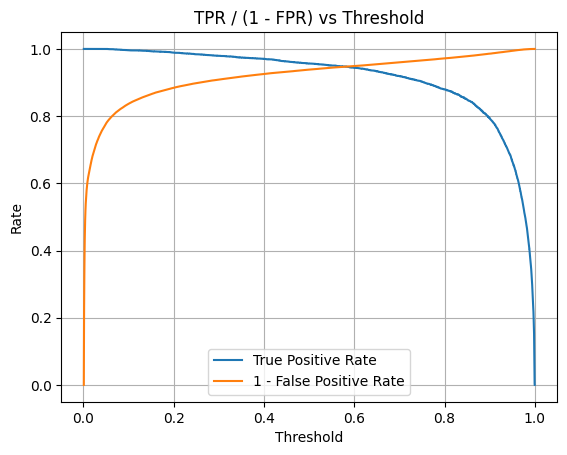

In [0]:
import matplotlib.pyplot as plt

plt.plot(thresholds, tpr, label="True Positive Rate")
plt.plot(thresholds, 1 - fpr, label="1 - False Positive Rate")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("TPR / (1 - FPR) vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


Threshold : bayesian-optimization 기준

In [0]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import f1_score

y_proba = xgb_model.predict_proba(X_val)
y_proba_class1 = y_proba[:, 1]

# 목적 함수 정의
def optimize_threshold(threshold):
    threshold = float(threshold)
    y_pred = (y_proba_class1 >= threshold).astype(int)
    return f1_score(y_val, y_pred)

# Bayesian Optimization 설정
optimizer = BayesianOptimization(
    f=optimize_threshold,
    pbounds={"threshold": (0.1, 0.9)},
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=25)

best_threshold = optimizer.max['params']['threshold']
print(f"✅ Best threshold by Bayesian Optimization: {best_threshold:.4f}")


|   iter    |  target   | threshold |
-------------------------------------
| 1         | 0.5727    | 0.3996    |
| 2         | 0.7562    | 0.8606    |
| 3         | 0.6799    | 0.6856    |
| 4         | 0.6413    | 0.5789    |
| 5         | 0.4879    | 0.2248    |
| 6         | 0.7702    | 0.8998    |
| 7         | 0.7684    | 0.895     |
| 8         | 0.7702    | 0.8999    |
| 9         | 0.7703    | 0.8998    |
| 10        | 0.7701    | 0.9       |
| 11        | 0.7701    | 0.9       |
| 12        | 0.7703    | 0.8998    |
| 13        | 0.7699    | 0.9       |
| 14        | 0.77      | 0.9       |
| 15        | 0.77      | 0.9       |
| 16        | 0.7335    | 0.8117    |
| 17        | 0.3908    | 0.1       |
| 18        | 0.3908    | 0.1       |
| 19        | 0.3908    | 0.1       |
| 20        | 0.3908    | 0.1       |
| 21        | 0.3908    | 0.1       |
| 22        | 0.3908    | 0.1       |
| 23        | 0.3908    | 0.1       |
| 24        | 0.3908    | 0.1       |
| 25        

In [0]:
custom_threshold = 0.89
y_pred_custom = (y_proba[:, 1] >= custom_threshold).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

print(f"📊 Classification Report (threshold={custom_threshold})")
print(classification_report(y_val, y_pred_custom, target_names=["정상", "이상"]))

print("🧩 Confusion Matrix")
print(confusion_matrix(y_val, y_pred_custom))

📊 Classification Report (threshold=0.89)
              precision    recall  f1-score   support

          정상       0.99      0.98      0.99    112203
          이상       0.73      0.81      0.77      5905

    accuracy                           0.98    118108
   macro avg       0.86      0.90      0.88    118108
weighted avg       0.98      0.98      0.98    118108

🧩 Confusion Matrix
[[110436   1767]
 [  1140   4765]]
